# Introductory applied machine learning (INFR10069)

# Assignment 1: Data analysis and visualisation

<span style="color:red">Q1: 35, Q2: 50, total: 85</span>

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

## Mechanics

You should produce a Jupyter notebook in answer to this assignment.
**You need to submit this notebook electronically as described below.**

Place your notebook in a directory called `iamlans` and submit this directory using the submit command on a DICE machine. The format is:

`submit iaml 1 iamlans`

You can check the status of your submissions with the `show submissions` command.

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).


## Important Instructions

1. In the following questions you are asked to run experiments using Python (version 2.7) and the following packages:
    * Numpy
    * Pandas
    * Scikit-learn
    * Matplotlib
    * Seaborn

2. Before you start make sure you have set up a vitual environment (or conda environment if you are working on your own machine) and the required packages installed. Instructions on how to set-up the working enviornment and install the required packages can be found in `01_Lab_1_Introduction`.

3. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers.

4. The .csv files that you will be using are located at `./datasets` (the `datasets` directory is adjacent to this file).

5. **IMPORTANT:** Keep your answers brief and concise. Most questions can be answered with 2-3 lines of explanation (excluding coding questions).

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignemnt.

In [1]:
from __future__ import print_function, division
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sklearn
import seaborn as sns
%matplotlib inline

## Description of the dataset

This assignment is based on the 20 Newsgroups Dataset. This dataset is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware, comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale, soc.religion.christian). 

There are three versions of the 20 Newsgroups Dataset. In this assignment we will use the `bydate` matlab version in which documents are sorted by date into training (60%) and test (40%) sets, newsgroup-identifying headers are dropped and duplicates are removed. This collection comprises roughly 61,000 different words, which results in a bag-of-words representation with frequency counts. More specifically, each document is represented by a 61,000 dimensional vector that contains the counts for each of the 61,000 different words present in the respective document. 

To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We will use documents from only 5 out of the 20 newsgroups, which results in a 5-class problem. More specifically the 5 classes correspond to the following newsgroups: 
1. `alt.atheism`
2. `comp.sys.ibm.pc.hardware`
3. `comp.sys.mac.hardware`
4. `rec.sport.baseball`
5. `rec.sport.hockey `

However, note here that classes 2-3 and 4-5 are rather closely related. Additionally, we computed the [mutual information](https://en.wikipedia.org/wiki/Mutual_information) of each word with the class attribute and selected the 520 words out of 61,000 that had highest mutual information. Therefore, our dataset is a $N \times 520$ dimensional matrix, where $N$ is the number of documents. For very sophisticated technical reasons 1 was added to all the word counts in part A. The resulting representation is much more compact and can be used directly to perform our experiments in Python.

## 1. Exploration of the dataset [40%]

Your first task is to get a feel for the data that you will be dealing with in the rest of the assignment.

### ========== Question 1.1 ==========
Load the datasets `train_20news_partA.csv` and `train_20news_partB.csv` into two separate pandas DataFrames.

<span style="color:red">OK</span>

In [2]:
data_A = os.path.join(os.getcwd(), 'datasets', 'train_20news_partA.csv')
dataframeA= pd.read_csv(data_A, delimiter=',' )

data_B = os.path.join(os.getcwd(), 'datasets',  'train_20news_partB.csv')
dataframeB= pd.read_csv(data_B, delimiter= ',' )


### ========== Question 1.2 ==========
Display basic information for dataset A such as number of columns, type, and memory usage (*hint: pandas dataframes have a built in method for this*) 

<span style="color:red">OK</span>

In [3]:
dataframeA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2129 entries, 0 to 2256
Columns: 521 entries, w1_aaa to class
dtypes: int64(521)
memory usage: 8.5 MB


### ========== Question 1.3 ==========
How many data points and how many attributes are there in the dataset that we can use to model the target variable `class`?

<span style="color:red">2129 datapoints, correct about attrs</span>

datapoints:2257*(521-1)=1173640
attributes:520


### ========== Question 1.4  ==========
Use a Pandas method to display the summary statistics for the `news_A` DataFrame.

<span style="color:red">OK</span>

In [4]:

dataframeA.describe()

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
count,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.00000,2129.000000,2129.000000,2129.000000,2129.000000,...,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000
mean,5.128229,6.097698,6.120244,5.551902,5.521841,6.12776,5.633161,6.090653,5.970409,5.624706,...,9.666510,9.217473,9.061531,9.398309,9.175200,9.708783,8.807891,9.719587,9.307656,3.092532
std,38.292577,46.190953,46.656022,40.953913,40.978098,45.96434,41.146918,45.762060,44.266628,40.769105,...,45.844064,43.948910,40.969185,43.833064,42.403283,47.294120,39.341038,46.185082,45.059367,1.395948
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,3.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,4.000000
max,572.000000,583.000000,579.000000,580.000000,591.000000,600.00000,546.000000,591.000000,578.000000,578.000000,...,590.000000,587.000000,577.000000,598.000000,568.000000,599.000000,585.000000,600.000000,597.000000,5.000000


### ========== Question 1.5 ==========
Display the first 7 instances of dataset A.

<span style="color:red">OK</span>

In [5]:
dataframeA.head(7)

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
0,1,1,1,1,1,1,1,1,1,1,...,1,5,3,6,8,4,6,4,8,4
1,1,1,1,1,1,1,1,1,1,1,...,2,3,6,8,3,4,5,6,5,4
2,1,1,1,1,1,1,1,1,1,2,...,4,2,6,5,2,5,5,7,8,2
3,1,1,1,1,1,1,1,1,1,1,...,6,3,6,1,1,8,1,8,4,3
4,1,1,1,1,1,1,1,1,1,1,...,6,1,7,8,6,3,1,8,4,3
5,1,1,1,1,1,1,1,1,1,1,...,7,5,4,5,5,7,7,7,2,2
6,1,1,1,1,2,1,1,1,1,1,...,3,6,8,8,3,5,2,1,2,1


### ========== Question 1.6 ==========
Display the names of the first 100 attributes in dataset A. 

You might observe that each attribute consists of two parts:
1. `w<x>_` (where x is an index corresponding to each word)
2. the actual name of the word

<span style="color:red">OK</span>

In [6]:
list(dataframeA.columns[0:100].values)

['w1_aaa',
 'w2_pins',
 'w3_kmr',
 'w4_notion',
 'w5_queens',
 'w6_dwyer',
 'w7_defenseman',
 'w8_gld',
 'w9_tocchet',
 'w10_home',
 'w11_buying',
 'w12_internet',
 'w13_slots',
 'w14_compatible',
 'w15_transfer',
 'w16_baltimore',
 'w17_mean',
 'w18_person',
 'w19_performance',
 'w20_support',
 'w21_tor',
 'w22_gm',
 'w23_mouse',
 'w24_base',
 'w25_population',
 'w26_bob',
 'w27_set',
 'w28_it',
 'w29_earth',
 'w30_faith',
 'w31_steve',
 'w32_caps',
 'w33_printer',
 'w34_east',
 'w35_cable',
 'w36_adapter',
 'w37_mss',
 'w38_catcher',
 'w39_bullpen',
 'w40_obp',
 'w41_innocent',
 'w42_european',
 'w43_angeles',
 'w44_settings',
 'w45_words',
 'w46_rit',
 'w47_shots',
 'w48_ports',
 'w49_vga',
 'w50_coverage',
 'w51_jumpers',
 'w52_bases',
 'w53_sea',
 'w54_pts',
 'w55_behavior',
 'w56_domi',
 'w57_sabres',
 'w58_yzerman',
 'w59_messier',
 'w60_goalies',
 'w61_hawks',
 'w62_our',
 'w63_sx',
 'w64_view',
 'w65_hitters',
 'w66_richard',
 'w67_point',
 'w68_nyi',
 'w69_mvp',
 'w70_kill',


### ========== Question 1.7 ==========
Familiarise yourself with the [`stripplot`](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.stripplot.html) function in `seaborn`. Pick one attribute of your choice (except `class`) and display a stripplot for that attribute for dataset A. Demonstrate the distribution of the data separately for each class (by making appropriate use of the `x` argument in `stripplot`). Set the `jitter` argument to `True` and the `alpha` argument to an appropriate value (to add transparency). When the jitter parameter is enabled a small amount of noise is added to the data so that there is less overlap and the distribution is easier to visualise.

<span style="color:red">OK</span>

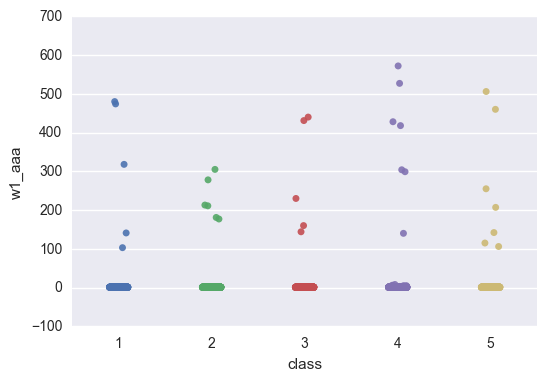

In [7]:
ax = sns.stripplot(y="w1_aaa",x="class",data=dataframeA,jitter=True, alpha  = .9)

### ========== Question 1.8 ==========
The stripplot illustrates the distribution of a single attribute. We can also visualise the joint distribution of two variables by using a scatter plot. Again, we want to add a bit of noise into the data so that is easier to see which parts of the space (2-dimensional in our case) have larger probability densities. 

For this, you will be using the function `scatter_jitter` provided below. This function takes as input two numpy arrays containing the features of interest. Pick two attributes of your choice from dataset A and use the provided function to plot their joint distribution. You can play around with the amount of noise added by tweaking the `jitter` parameter. Alternatively, you can just use its default value which is set to 0.2.

<span style="color:red">OK but you could label axes better</span>

In [8]:
def scatter_jitter(arr1, arr2, jitter=0.9):
    """ Plots a joint scatter plot of two arrays by adding small noise to each example. 
    Noise is proportional to variance in each dimension. """
    arr1 = np.asarray(arr1)
    arr2 = np.asarray(arr2)
    arr1 = arr1 + jitter*arr1.std(axis=0)*np.random.standard_normal(arr1.shape)
    arr2 = arr2 + jitter*arr2.std(axis=0)*np.random.standard_normal(arr2.shape)
    plt.scatter(arr1, arr2, marker=4)

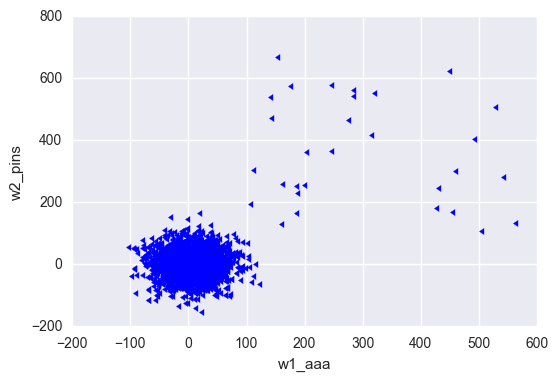

In [9]:
scatter_jitter(dataframeA["w1_aaa"],dataframeA["w2_pins"])
plt.xlabel("w1_aaa")
plt.ylabel("w2_pins")

### ========== Question 1.9 ==========
From the strip and scatter plots above you might observe that there is something peculiar about the data. Indeed most attributes take very small values (usually in the range 1-10) but there are some data points (i.e. rows) in the dataset where the attributes take very large values. These data points are called [outliers](https://en.wikipedia.org/wiki/Outlier).

You might think that the presence of outliers in the dataset has been a resut of noise contamination (you wouldn't expect the same word to appear 600 times within an e-mail, would you?). Your job now is to create a new dataset from dataset A (name it `news_A_clean`) and remove the outliers. Create some metric to find the outliers and check that your metric is reasonable. Be careful not to alter the original `news_A`...we may require it in its dirty format later...

<span style="color:red">OK but you could've elaborated a bit more on your choice of outlier detection method and argued why it works</span>

In [10]:
#in this problem, i dropped the extreme outlier, if you wanna drop more outliers, just change stdA*3 to stdA*2 :)
stdA=dataframeA.std()

upperbound=stdA*3+dataframeA.mean()

lowwerbound=dataframeA.mean()-stdA*3

news_A_clean=dataframeA[dataframeA <upperbound]

news_A_clean1=news_A_clean[news_A_clean>lowwerbound]

news_A_clean1=news_A_clean1.dropna()

news_A_clean1.describe()



,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
count,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,...,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000
mean,1.025788,1.017670,1.014804,1.007641,1.006208,1.010506,1.013372,1.024355,1.012416,1.080707,...,4.574976,4.468481,4.532951,4.560172,4.531996,4.512894,4.508596,4.521968,4.411652,3.094556
std,0.280440,0.205452,0.172861,0.106810,0.078566,0.134333,0.190086,0.274543,0.154061,0.460250,...,2.283296,2.274458,2.331490,2.292712,2.335394,2.258408,2.288690,2.298184,2.296381,1.393672
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,3.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,7.000000,6.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,6.000000,4.000000
max,8.000000,7.000000,5.000000,4.000000,2.000000,4.000000,7.000000,5.000000,4.000000,16.000000,...,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,5.000000


### ========== Question 1.10 ==========
Write code to return the number of data points in the clean dataset, and the number of documents that have been excluded as outliers

<span style="color:red">OK</span>

In [11]:
print(len(news_A_clean1)) #number of data points in the clean dataset
print(len(dataframeA)-len(news_A_clean1)) #number of documens that have been exculded as outliers

2094
35


## 2. Naive Bayes classification [60%]
Now we want to fit a Gaussian Naive Bayes model to the cleaned dataset A. You might want first to familiarise yourself with the [`GaussianNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) class in `Sklearn`.

### ========== Question 2.1 ==========

By using the `scatter_jitter` function provided above, display a scatter plot of the features `w281_ico` and `w273_tek` for the cleaned dataset A. Set the jitter value to something small (e.g. 0.1). Label axes appropriately.

<span style="color:red">fine but label axes with something more descriptive than just attribute name in the dataframe</span>

In [28]:
def scatter_jitter(arr1, arr2, jitter=0.1):
    """ Plots a joint scatter plot of two arrays by adding small noise to each example. 
    Noise is proportional to variance in each dimension. """
    arr1 = np.asarray(arr1)
    arr2 = np.asarray(arr2)
    arr1 = arr1 + jitter*arr1.std(axis=0)*np.random.standard_normal(arr1.shape)
    arr2 = arr2 + jitter*arr2.std(axis=0)*np.random.standard_normal(arr2.shape)
    plt.scatter(arr1, arr2, marker=4)

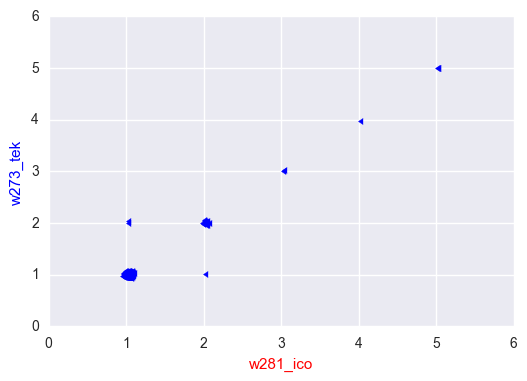

In [35]:
    scatter_jitter(news_A_clean1["w281_ico"],news_A_clean1["w273_tek"])
    plt.xlabel("w281_ico",color='red')
    plt.ylabel("w273_tek",color='blue')

### ========== Question 2.2 ==========
What do you observe? 

How does that relate to the Naive Bayes assumption? 

What would be the main issue we would have to face if we didn't make this assumption?

From the picture above we can see the domain of x axis and y axis is becoming smaller(0-6), which means the range of the distribution is becoming smaller, compared to Q1.8.

It realtes to Naive Bayes because these two cases(w281_ico, w273_tek) have high correlation since they have a linear relationship with each other. Thus, if we dont use naive Bayes assumption, which means we condider these attributes are dependent. 
However, there might be potentially have a probability equals to zero, and also because there are too much data, so it will not make calculation be hard to be processed.


 <span style="color:red">fine you got the main points - correlation of attributes and difficulty building cov matrix but could've explained more</span>

### ========== Question 2.3 ==========
Fit a Gaussian Naive Bayes model to the cleaned dataset A. Your input features should be all the attributes in the dataset except the `class` attribute which will be your target. Display the classification accuracy on the training dataset.

<span style="color:red"> OK future reference it's worth rounding floating point numbers to a few (3-4) significant digits when printing </span>

In [14]:
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, confusion_matrix

traindata=news_A_clean1[news_A_clean1.columns[:520]]

targetdata=news_A_clean1["class"]

clf = GaussianNB()

predictvalue= clf.fit(traindata,targetdata).predict(traindata)

print(accuracy_score(predictvalue, targetdata))


0.87917860554


### ========== Question 2.4 ==========
Plot the (normalised) confusion matrix for the training data. Label axes appropriately.

<span style="color:red"> fine but label columns with something more descriptive than just class indices, you could've used class names </span>

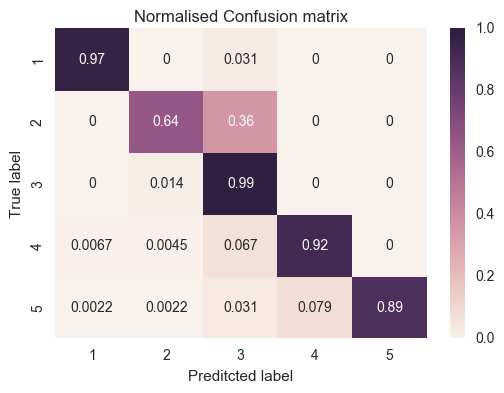

In [15]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_test = news_A_clean1["class"]

pred=predictvalue

cm=confusion_matrix(y_test,pred)

cm_nor = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]

def plot_confusion_matrix(cm, classes=None, title='Normalised Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
                    
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Preditcted label')
                    
plot_confusion_matrix(cm_nor,classes=["1","2","3","4","5"])

### ========== Question 2.5  ==========

Comment on the confusion matrix from the previous question. Does it look like what you would have expected? Explain.

yes, it looks like what I expect. From Question 2.3, we can see that accuracy is about.88, and from the confusion matrix shown in 2.4, we can obverse from the diagonal line that numbers are close to .88. And also if we compute it in math ,  i.e: for class 1: true label is .97+0.031=1.001, predict= 0.0022+0.0067+0.97=0.9789, 0.9789/1.001=.97, which matches. 
However, the probability for class 2 is a little bit low, and it might bacuase the datapoints are not reasonable.

<span style="color:red"> what you said is technically correct but not very insightful, should've commented on common misclasifications, e.g. comp.sys.ibm.pc.hardware for comp.sys.mac.hardware classes </span>

### ========== Question 2.6 ==========
Fit a Gaussian Naive Bayes model to the original dataset A (including the outliers). Display the classification accuracy on the training dataset.

<span style="color:red">OK</span>

In [16]:
# Your code goes here
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, confusion_matrix

traindata1=dataframeA[dataframeA.columns[:520]]

targetdata1=dataframeA["class"]

clf1 = GaussianNB()

predictvalue1= clf1.fit(traindata1,targetdata1).predict(traindata1)

print(accuracy_score(predictvalue1, targetdata1))

0.205260685768


### ========== Question 2.7 ==========
Comment on the above results (Questions 2.3 & 2.6). In particular explain why you think that cleaning the data helps in this case.

it is pretty obvious, in 2.3, the accuracy is about .88, but in 2.6, the accuracy reduces to .21. Since outliers are extreme values, so if we dont drop them , it will mislead the training process and pull down the accuracy. 

<span style="color:red">OK, Gaussians are particularly prone to outliers</span>

### ========== Question 2.8 ==========

Now we want to evaluate the generalisation of the classifier on new (i.e. unseen data). Use the classifier you trained in Question 2.5 (i.e. on the cleaned dataset) and test its performance on dataset `train_20news_partB`. 

Display the (normalized) confusion matrix and the classification accuracy on the Dataset B.

<span style="color:red">OK</span>

In [17]:
traindataB=dataframeB[dataframeB.columns[:520]]

targetdataB=dataframeB["class"]

clfB = GaussianNB()

predictvalueB= clfB.fit(traindata,targetdata).predict(traindataB)

print(accuracy_score(targetdataB,predictvalueB))

0.828125


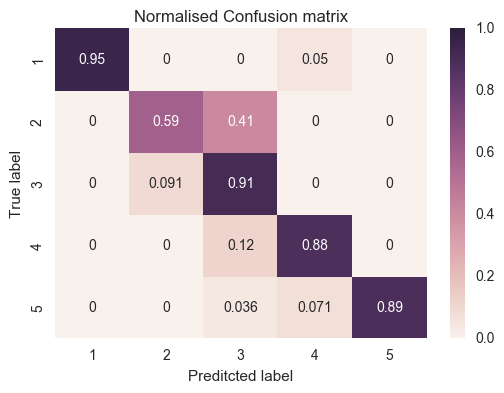

In [18]:

cmB=confusion_matrix(targetdataB,predictvalueB)

cm_norB = cmB.astype('float')/cmB.sum(axis=1)[:,np.newaxis]
                    
plot_confusion_matrix(cm_norB,classes=["1","2","3","4","5"])

### ========== Question 2.9 ==========

Comment on the results from the previous question. Do you think this is an acceptable level of performance? Which are the easiest and most difficult classes to predict correctly? 

i think this is an acceptable level of performace because it provides a chance for us to compare the different results while predicting  different train data. The easiest class to predict collectly is class 1 becuase it has the hightest value .95, the most difficult class to predict correctly is class 2. 

<span style="color:red">OK</span>

### ========== Question 2.10 ==========
What is a reasonable baseline against which to compare the classiffication performance? *Hint: What is the simplest classiffier you can think of and what would its performance be on this dataset?* 

The simplest classiffier I can think about is that there exist a class that can obtain all the data points, so the probable will go to this class. 
Since there are 5 class on this dataset, and assumpe they are treated equally, so the reasonable baseline in this case will be 1/5=.2

<span style="color:red">Unclear explanation but I think you're on the right track</span>

### ========== Question 2.11 ==========

Estimate the baseline performance.

<span style="color:red">OK</span>

In [19]:
# Your code goes here
from sklearn.dummy import DummyClassifier

dummy_classifier = DummyClassifier(strategy="most_frequent")

dummy_classifier.fit(traindata,targetdata)

predictvalue=dummy_classifier.fit(traindata,targetdata).predict(traindataB)

print(accuracy_score(targetdataB,predictvalue))

0.203125


### ========== Question 2.12 ==========

Execute the cell below to get the prediction on the test dataset by using a different classifier which we will be introducing in this class later on. By using this prediction provided below (`rf_prediction`) plot the confusion matrix and display the classification accuracy on the test dataset. *Important: Make sure the test dataset is loaded in a DataFrame called `news_B` otherwise execution will return an error. In that case replace the DataFrame name in the third line.*

0.859375


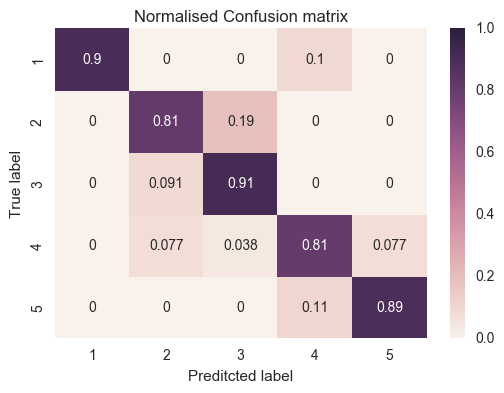

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 50).fit(traindata,targetdata)

rf_prediction = rf.predict(traindataB)## because my traindata B does not include the "class", so i delete the line 
# Your code goes here
print(accuracy_score(targetdataB,rf_prediction))
cm = confusion_matrix(targetdataB, rf_prediction)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(cm_norm, classes=[1,2,3,4,5])

### ========== Question 2.13 ==========

Which classifier (Naive Bayes or Random Forest) would you trust if you had to choose? What are the reasons you believe the Gaussian Naive Bayes classifier does not perofm so well in this particular problem? You are not expected to justify the performance level achieved by the Random Forest classifier.

I will trust Random forest classifier, the reason I believe that Gaussian Naive Bayes classifier does not perform so well is becuase as I talked in Q2.2, the 2 attributes have a high correlation. However, since we use GNB classifier, we forced to treate them as independent values, so that would be the reason why GNB classifier is less reasonable. 
Also, by comparing two Confusion matrix, we can see that for class 2, Random Forest has a higher value than RNB.

<span style="color:red">fine, could've mentioned something more about ability to generalise and sensitivity to outliers</span>